### 项目描述
- 零售行业遍布在我们的身边，无论是线上还是线下，在流量获客越来越贵的今天，已有用户价值的分析成为了每一个企业越来越重要的话题，本项目将带你使用RFM模型来进行用户价值分析，将已有用户进行不同价值层级的划分，服务于个性化营销、增强用户体验等场景。
### 难度：2
### 知识点
- RFM模型、NumPy、Pandas、Matplotlib、seaborn、plotly、归一化、数据分析常用指标

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid',font_scale=1.5)   # 图形背景和字体设置
plt.rcParams['font.sans-serif']='SimHei'   # 解决中文字体不显示的问题

In [2]:
# 读入数据
data = pd.read_csv('data.csv',encoding='utf-8')
print(data.shape)
data.head()

(541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

### 数据清洗


##### 1、查看数据类型


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##### 2、重复值处理

In [4]:
print('重复数据占比：',format(data.duplicated().sum()/len(data)*100))

重复数据占比： 0.9721189350979592


In [5]:
data.drop_duplicates(inplace=True)

##### 3、缺失值处理

In [6]:
# 统计缺失值的占比
data.isnull().sum()/len(data)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [7]:
# 删除CustomerID为空的数据
data.dropna(subset=['CustomerID'],inplace=True)

##### 4、数据类型转换

In [9]:
# 把InvoiceDate转换为datetime类型
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null object
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


##### 5、重置索引

In [10]:
data.reset_index(drop=True,inplace=True)

##### 6、快速查看统计信息

In [11]:
data.describe()

Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

In [12]:
# Quantity异常值数量
data[data['Quantity']<0]['Quantity'].count()

8872

In [13]:
# 删除异常值
data = data[~data['Quantity']<0]
data.describe()

Quantity      UnitPrice
count  392732.000000  392732.000000
mean       13.153718       3.125596
std       181.588420      22.240725
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

### 数据分析

In [14]:
# 各国家的客户数
data.groupby(data['Country'])['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Denmark                    9
Australia                  9
Netherlands                9
Cyprus                     8
Japan                      8
Sweden                     8
Poland                     6
Unspecified                4
Greece                     4
USA                        4
Canada                     4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Czech Republic             1
Singapore                  1
Lithuania                  1
Saudi Arabia               1
Brazil                     1
RSA                        1
Icelan

- ——客户主要分布在英国，其次是德国和法国，可以看出公司业务市场是基于欧洲。



#### 1、PV和UV变化趋势

In [15]:
data['date'] = data['InvoiceDate'].dt.date
data['month'] = data['InvoiceDate'].dt.month
data['hour']= data['InvoiceDate'].dt.hour.astype(int)

In [16]:
# 计算每日访问量PV
pv=data.groupby('date')['CustomerID'].count()
# 计算每日访客数
uv=data.groupby('date')['CustomerID'].nunique()

In [17]:
pv_uv=pd.concat([pv,uv],axis=1)
pv_uv.columns=['pv','uv']

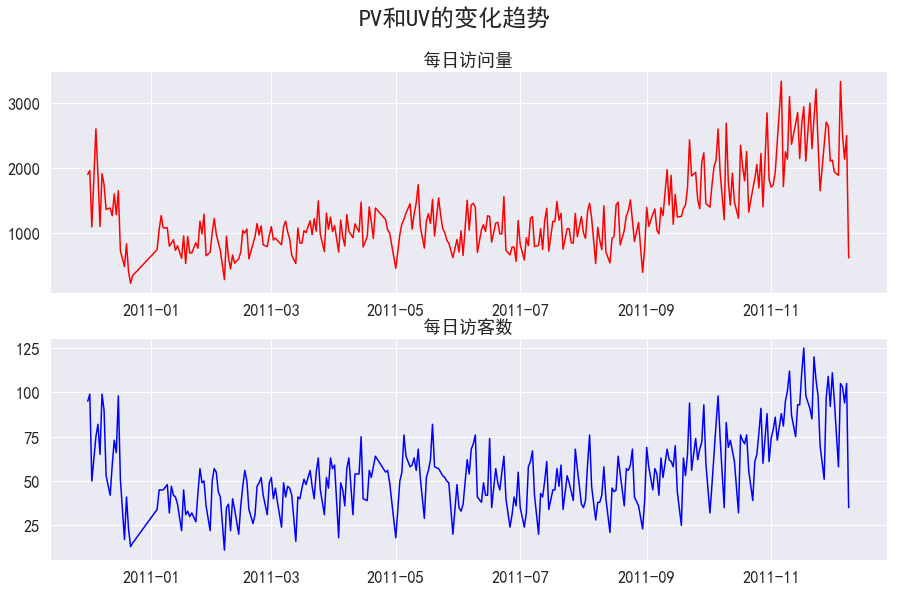

In [18]:
# 绘制PV和UV每日的变化趋势图
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.plot(pv,color='red')
plt.title('每日访问量')
plt.subplot(212)
plt.plot(uv,color='blue')
plt.title('每日访客数')
plt.suptitle('PV和UV的变化趋势',fontsize=24)
plt.show()

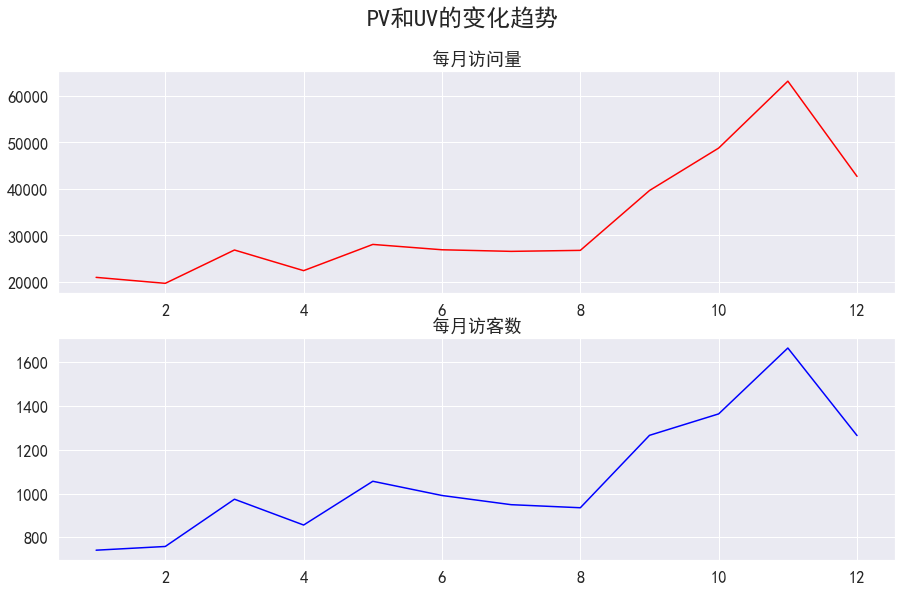

In [19]:
# 计算每日访问量PV
pv=data.groupby('month')['CustomerID'].count()
# 计算每日访客数
uv=data.groupby('month')['CustomerID'].nunique()
pv_uv=pd.concat([pv,uv],axis=1)
pv_uv.columns=['pv','uv']
# 绘制PV和UV每日的变化趋势图
plt.figure(figsize=(15,9))
plt.subplot(211)
plt.plot(pv,color='red')
plt.title('每月访问量')
plt.subplot(212)
plt.plot(uv,color='blue')
plt.title('每月访客数')
plt.suptitle('PV和UV的变化趋势',fontsize=24)
plt.show()

- 由趋势图可以看出1、2月份访客量和访问量最低，因为大多数是新客户；二月份后PV和UV开始上升并趋于平稳，说明现在大多为客户；8月份后PV和UV开始急速上升到11月份时达到峰值，然后又开始急速下降，原因可能是8—11月份期间在做促销活动。



In [20]:
# 计算每日访问量PV
pv=data.groupby('hour')['CustomerID'].count()
# 计算每日访客数
uv=data.groupby('hour')['CustomerID'].nunique()
pv_uv=pd.concat([pv,uv],axis=1)
pv_uv.columns=['pv','uv']

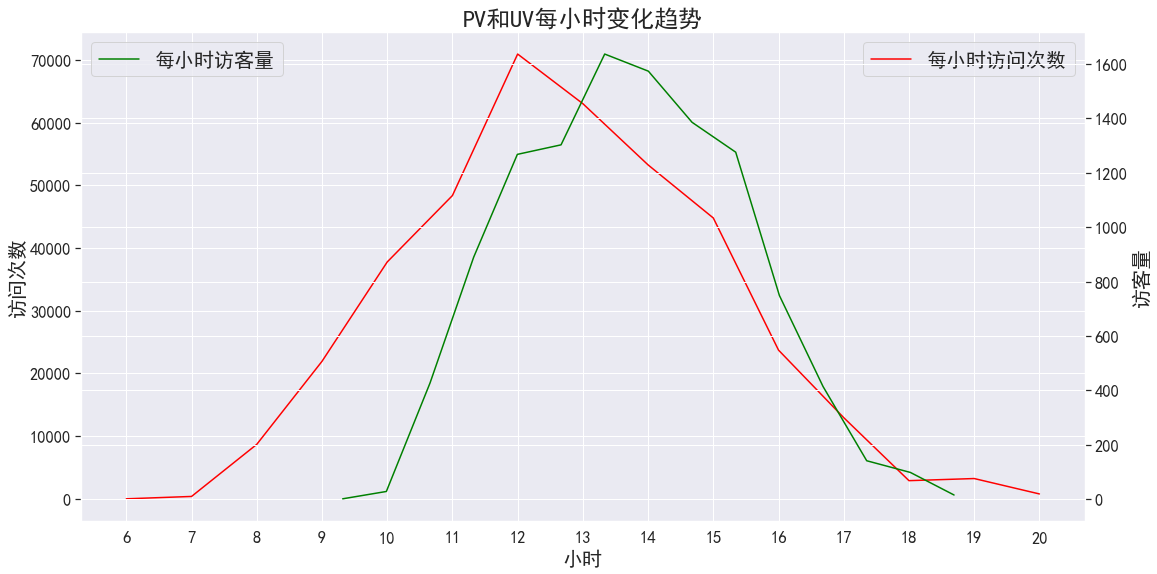

In [21]:
# 绘制PV和UV每小时变化趋势
fig, ax1 = plt.subplots(figsize = (18, 9))

ax1.plot(pv_uv['pv'],color='red',label='每小时访问次数')
ax1.set_ylabel('访问次数',fontsize=20)
ax1.set_xlabel('小时',fontsize=20)
plt.legend(loc='upper right',fontsize=20)

ax2=ax1.twinx()   # 第二坐标轴的创建 
ax2.plot(pv_uv['uv'],color='green',label='每小时访客量')
ax2.set_ylabel('访客量',fontsize=20)
plt.legend(loc='upper left',fontsize=20)

plt.xticks(range(0,24))
plt.title('PV和UV每小时变化趋势',fontsize=24)
plt.show()

- 一天中12点访问量最高，13点—14点访客数最高，我们可以在11点—14点期间做促销增加收益，18点-6点PV和UV趋于0

### 2、RFM模型
# 这里要讲一下什么是RFM模型

In [22]:
date_max = data['InvoiceDate'].max()

In [23]:
import datetime
# 计算销售金额
data['sales'] = data['Quantity']*data['UnitPrice']

In [24]:
R = (date_max-data.groupby('CustomerID')['InvoiceDate'].max()).dt.days
F = data.groupby('CustomerID')['CustomerID'].count()
M = data.groupby('CustomerID')['sales'].sum()

In [25]:
RFM = pd.concat([R,F,M],axis=1)
RFM.columns = (['R','F','M'])
RFM.head()

R    F         M
CustomerID                    
12346.0     325    1  77183.60
12347.0       1  182   4310.00
12348.0      74   31   1797.24
12349.0      18   73   1757.55
12350.0     309   17    334.40

In [27]:
# 将数据归一化
rfm = RFM[['R','F','M']].apply(lambda x:(x-x.min())/(x.max()-x.min()))
# 通过*100转化成可读性数据
rfm = rfm.apply(lambda x:round(x*100,2))

- 计算用于划分客户的阙值，代表R、F、M的中位数

In [28]:
rfm.describe()

R            F            M
count  4339.000000  4339.000000  4339.000000
mean     24.535642     1.166308     0.730959
std      26.812324     2.938303     3.206299
min       0.000000     0.000000     0.000000
25%       4.560000     0.210000     0.110000
50%      13.400000     0.520000     0.240000
75%      37.800000     1.260000     0.590000
max     100.000000   100.000000   100.000000

In [29]:
# 平均值不具有代表性，选用中位数作为阀值
rm = rfm['R'].median()
fm = rfm['F'].median()
mm = rfm['M'].median()
rm,fm,mm

(13.4, 0.52, 0.24)

In [31]:
rfm['r'] = np.where( rfm['R']>=13.4,'低','高')
rfm['f'] = np.where( rfm['F']>=0.52,'高','低')
rfm['m'] = np.where( rfm['M']>=0.24,'高','低')
rfm

R     F      M  r  f  m
CustomerID                             
12346.0     87.13  0.00  27.55  低  低  高
12347.0      0.27  2.36   1.54  高  高  高
12348.0     19.84  0.39   0.64  低  低  高
12349.0      4.83  0.94   0.63  高  高  高
12350.0     82.84  0.21   0.12  低  低  低
12352.0      9.38  1.09   0.89  高  高  高
12353.0     54.42  0.04   0.03  低  低  低
12354.0     61.93  0.74   0.39  低  高  高
12355.0     57.10  0.16   0.16  低  低  低
12356.0      5.90  0.76   1.00  高  高  高
12357.0      8.58  1.69   2.22  高  高  高
12358.0      0.27  0.23   0.42  高  低  高
12359.0     15.28  3.18   2.25  低  高  高
12360.0     13.67  1.67   0.95  低  高  高
12361.0     76.68  0.12   0.07  低  低  低
12362.0      0.54  3.45   1.87  高  高  高
12363.0     29.22  0.29   0.20  低  低  低
12364.0      1.88  1.09   0.47  高  高  高
12365.0     77.75  0.27   0.23  低  低  低
12367.0      0.80  0.13   0.06  高  低  低
12370.0     13.40  2.15   1.26  低  高  高
12371.0     11.80  0.81   0.67  高  高  高
12372.0     19.03  0.66   0.46  低  高  高
12373.0     83.11  0.17   0.13  低  低  低
12374.0      6.43  0.42   0.27  高  低  高
12375.0      2.68  0.21   0.16  高  低  低
12377.0     84.18  0.99   0.58  低  高  高
12378.0     34.58  2.84   1.43  低  高  高
12379.0     21.72  0.51   0.30  低  低  高
12380.0      5.63  1.34   0.97  高  高  高
...           ...   ...    ... .. .. ..
18242.0     19.03  1.00   0.80  低  高  高
18245.0      1.61  2.27   0.92  高  高  高
18246.0      6.17  0.04   0.21  高  低  低
18248.0     32.71  0.60   0.29  低  高  高
18249.0      4.29  0.09   0.03  高  低  低
18250.0     82.84  0.26   0.12  低  低  低
18251.0     23.06  0.20   1.54  低  低  高
18252.0     13.40  1.21   0.18  低  高  低
18255.0     23.59  0.07   0.04  低  低  低
18257.0     10.19  1.52   0.83  高  高  高
18259.0      6.43  0.53   0.83  高  高  高
18260.0     46.11  1.72   0.94  低  高  高
18261.0     11.26  0.26   0.12  高  低  低
18262.0     37.27  0.16   0.05  低  低  低
18263.0      6.70  0.78   0.43  高  高  高
18265.0     19.03  0.59   0.29  低  高  高
18268.0     35.66  0.00   0.01  低  低  低
18269.0     97.86  0.08   0.06  低  低  低
18270.0      9.92  0.13   0.10  高  低  低
18272.0      0.54  2.15   1.10  高  高  高
18273.0      0.27  0.03   0.07  高  低  低
18274.0      7.77  0.13   0.06  高  低  低
18276.0     11.53  0.17   0.12  高  低  低
18277.0     15.28  0.09   0.04  低  低  低
18278.0     19.57  0.10   0.06  低  低  低
18280.0     74.26  0.12   0.06  低  低  低
18281.0     48.26  0.08   0.03  低  低  低
18282.0      1.88  0.14   0.06  高  低  低
18283.0      0.80  9.38   0.73  高  高  高
18287.0     11.26  0.90   0.66  高  高  高

[4339 rows x 6 columns]

In [32]:
rfm['value'] = rfm['r'].str[:]+rfm['f'].str[:]+rfm['m'].str[:]
rfm

R     F      M  r  f  m value
CustomerID                                   
12346.0     87.13  0.00  27.55  低  低  高   低低高
12347.0      0.27  2.36   1.54  高  高  高   高高高
12348.0     19.84  0.39   0.64  低  低  高   低低高
12349.0      4.83  0.94   0.63  高  高  高   高高高
12350.0     82.84  0.21   0.12  低  低  低   低低低
12352.0      9.38  1.09   0.89  高  高  高   高高高
12353.0     54.42  0.04   0.03  低  低  低   低低低
12354.0     61.93  0.74   0.39  低  高  高   低高高
12355.0     57.10  0.16   0.16  低  低  低   低低低
12356.0      5.90  0.76   1.00  高  高  高   高高高
12357.0      8.58  1.69   2.22  高  高  高   高高高
12358.0      0.27  0.23   0.42  高  低  高   高低高
12359.0     15.28  3.18   2.25  低  高  高   低高高
12360.0     13.67  1.67   0.95  低  高  高   低高高
12361.0     76.68  0.12   0.07  低  低  低   低低低
12362.0      0.54  3.45   1.87  高  高  高   高高高
12363.0     29.22  0.29   0.20  低  低  低   低低低
12364.0      1.88  1.09   0.47  高  高  高   高高高
12365.0     77.75  0.27   0.23  低  低  低   低低低
12367.0      0.80  0.13   0.06  高  低  低   高低低
12370.0     13.40  2.15   1.26  低  高  高   低高高
12371.0     11.80  0.81   0.67  高  高  高   高高高
12372.0     19.03  0.66   0.46  低  高  高   低高高
12373.0     83.11  0.17   0.13  低  低  低   低低低
12374.0      6.43  0.42   0.27  高  低  高   高低高
12375.0      2.68  0.21   0.16  高  低  低   高低低
12377.0     84.18  0.99   0.58  低  高  高   低高高
12378.0     34.58  2.84   1.43  低  高  高   低高高
12379.0     21.72  0.51   0.30  低  低  高   低低高
12380.0      5.63  1.34   0.97  高  高  高   高高高
...           ...   ...    ... .. .. ..   ...
18242.0     19.03  1.00   0.80  低  高  高   低高高
18245.0      1.61  2.27   0.92  高  高  高   高高高
18246.0      6.17  0.04   0.21  高  低  低   高低低
18248.0     32.71  0.60   0.29  低  高  高   低高高
18249.0      4.29  0.09   0.03  高  低  低   高低低
18250.0     82.84  0.26   0.12  低  低  低   低低低
18251.0     23.06  0.20   1.54  低  低  高   低低高
18252.0     13.40  1.21   0.18  低  高  低   低高低
18255.0     23.59  0.07   0.04  低  低  低   低低低
18257.0     10.19  1.52   0.83  高  高  高   高高高
18259.0      6.43  0.53   0.83  高  高  高   高高高
18260.0     46.11  1.72   0.94  低  高  高   低高高
18261.0     11.26  0.26   0.12  高  低  低   高低低
18262.0     37.27  0.16   0.05  低  低  低   低低低
18263.0      6.70  0.78   0.43  高  高  高   高高高
18265.0     19.03  0.59   0.29  低  高  高   低高高
18268.0     35.66  0.00   0.01  低  低  低   低低低
18269.0     97.86  0.08   0.06  低  低  低   低低低
18270.0      9.92  0.13   0.10  高  低  低   高低低
18272.0      0.54  2.15   1.10  高  高  高   高高高
18273.0      0.27  0.03   0.07  高  低  低   高低低
18274.0      7.77  0.13   0.06  高  低  低   高低低
18276.0     11.53  0.17   0.12  高  低  低   高低低
18277.0     15.28  0.09   0.04  低  低  低   低低低
18278.0     19.57  0.10   0.06  低  低  低   低低低
18280.0     74.26  0.12   0.06  低  低  低   低低低
18281.0     48.26  0.08   0.03  低  低  低   低低低
18282.0      1.88  0.14   0.06  高  低  低   高低低
18283.0      0.80  9.38   0.73  高  高  高   高高高
18287.0     11.26  0.90   0.66  高  高  高   高高高

[4339 rows x 7 columns]

In [33]:
# 去除字符之间的空格
rfm['value'] = rfm['value'].str.strip()

In [34]:
def trans_value(x):
    if x == '高高高':
        return '重要价值客户'
    elif x == '高低高':
        return '重要发展客户'
    elif x == '低高高':
        return '重要保持客户'
    elif x == '低低高':
        return '重要挽留客户'
    elif x == '高高低':
        return '一般价值客户'
    elif x == '高低低':
        return '一般发展客户'
    elif x == '低高低':
        return '一般保持客户'
    else:
        return '一般挽留客户' 

In [35]:
rfm['用户等级'] = rfm['value'].apply(trans_value)
rfm

R     F      M  r  f  m value    用户等级
CustomerID                                           
12346.0     87.13  0.00  27.55  低  低  高   低低高  重要挽留客户
12347.0      0.27  2.36   1.54  高  高  高   高高高  重要价值客户
12348.0     19.84  0.39   0.64  低  低  高   低低高  重要挽留客户
12349.0      4.83  0.94   0.63  高  高  高   高高高  重要价值客户
12350.0     82.84  0.21   0.12  低  低  低   低低低  一般挽留客户
12352.0      9.38  1.09   0.89  高  高  高   高高高  重要价值客户
12353.0     54.42  0.04   0.03  低  低  低   低低低  一般挽留客户
12354.0     61.93  0.74   0.39  低  高  高   低高高  重要保持客户
12355.0     57.10  0.16   0.16  低  低  低   低低低  一般挽留客户
12356.0      5.90  0.76   1.00  高  高  高   高高高  重要价值客户
12357.0      8.58  1.69   2.22  高  高  高   高高高  重要价值客户
12358.0      0.27  0.23   0.42  高  低  高   高低高  重要发展客户
12359.0     15.28  3.18   2.25  低  高  高   低高高  重要保持客户
12360.0     13.67  1.67   0.95  低  高  高   低高高  重要保持客户
12361.0     76.68  0.12   0.07  低  低  低   低低低  一般挽留客户
12362.0      0.54  3.45   1.87  高  高  高   高高高  重要价值客户
12363.0     29.22  0.29   0.20  低  低  低   低低低  一般挽留客户
12364.0      1.88  1.09   0.47  高  高  高   高高高  重要价值客户
12365.0     77.75  0.27   0.23  低  低  低   低低低  一般挽留客户
12367.0      0.80  0.13   0.06  高  低  低   高低低  一般发展客户
12370.0     13.40  2.15   1.26  低  高  高   低高高  重要保持客户
12371.0     11.80  0.81   0.67  高  高  高   高高高  重要价值客户
12372.0     19.03  0.66   0.46  低  高  高   低高高  重要保持客户
12373.0     83.11  0.17   0.13  低  低  低   低低低  一般挽留客户
12374.0      6.43  0.42   0.27  高  低  高   高低高  重要发展客户
12375.0      2.68  0.21   0.16  高  低  低   高低低  一般发展客户
12377.0     84.18  0.99   0.58  低  高  高   低高高  重要保持客户
12378.0     34.58  2.84   1.43  低  高  高   低高高  重要保持客户
12379.0     21.72  0.51   0.30  低  低  高   低低高  重要挽留客户
12380.0      5.63  1.34   0.97  高  高  高   高高高  重要价值客户
...           ...   ...    ... .. .. ..   ...     ...
18242.0     19.03  1.00   0.80  低  高  高   低高高  重要保持客户
18245.0      1.61  2.27   0.92  高  高  高   高高高  重要价值客户
18246.0      6.17  0.04   0.21  高  低  低   高低低  一般发展客户
18248.0     32.71  0.60   0.29  低  高  高   低高高  重要保持客户
18249.0      4.29  0.09   0.03  高  低  低   高低低  一般发展客户
18250.0     82.84  0.26   0.12  低  低  低   低低低  一般挽留客户
18251.0     23.06  0.20   1.54  低  低  高   低低高  重要挽留客户
18252.0     13.40  1.21   0.18  低  高  低   低高低  一般保持客户
18255.0     23.59  0.07   0.04  低  低  低   低低低  一般挽留客户
18257.0     10.19  1.52   0.83  高  高  高   高高高  重要价值客户
18259.0      6.43  0.53   0.83  高  高  高   高高高  重要价值客户
18260.0     46.11  1.72   0.94  低  高  高   低高高  重要保持客户
18261.0     11.26  0.26   0.12  高  低  低   高低低  一般发展客户
18262.0     37.27  0.16   0.05  低  低  低   低低低  一般挽留客户
18263.0      6.70  0.78   0.43  高  高  高   高高高  重要价值客户
18265.0     19.03  0.59   0.29  低  高  高   低高高  重要保持客户
18268.0     35.66  0.00   0.01  低  低  低   低低低  一般挽留客户
18269.0     97.86  0.08   0.06  低  低  低   低低低  一般挽留客户
18270.0      9.92  0.13   0.10  高  低  低   高低低  一般发展客户
18272.0      0.54  2.15   1.10  高  高  高   高高高  重要价值客户
18273.0      0.27  0.03   0.07  高  低  低   高低低  一般发展客户
18274.0      7.77  0.13   0.06  高  低  低   高低低  一般发展客户
18276.0     11.53  0.17   0.12  高  低  低   高低低  一般发展客户
18277.0     15.28  0.09   0.04  低  低  低   低低低  一般挽留客户
18278.0     19.57  0.10   0.06  低  低  低   低低低  一般挽留客户
18280.0     74.26  0.12   0.06  低  低  低   低低低  一般挽留客户
18281.0     48.26  0.08   0.03  低  低  低   低低低  一般挽留客户
18282.0      1.88  0.14   0.06  高  低  低   高低低  一般发展客户
18283.0      0.80  9.38   0.73  高  高  高   高高高  重要价值客户
18287.0     11.26  0.90   0.66  高  高  高   高高高  重要价值客户

[4339 rows x 8 columns]

In [36]:
rfm['用户等级'].value_counts()


重要价值客户    1295
一般挽留客户    1267
重要保持客户     509
一般发展客户     509
重要挽留客户     228
一般价值客户     198
一般保持客户     176
重要发展客户     157
Name: 用户等级, dtype: int64

### 3、基于RFM模型的可视化

In [38]:
# 绘制条形图
import plotly as py
import plotly.graph_objs as go
pyplot = py.offline.iplot
py.offline.init_notebook_mode()

In [39]:
trace_basic = [go.Bar(x=rfm['用户等级'].value_counts().index,
                      y=rfm['用户等级'].value_counts().values,
                     marker = dict(color='blue'),opacity=0.5)]
layout = go.Layout(title = '用户等级情况',xaxis = dict(title='用户重要度'))
figure_basic = go.Figure(data = trace_basic,layout = layout)
pyplot(figure_basic)

In [40]:
trace = [go.Pie(labels = rfm['用户等级'].value_counts().index,
               values = rfm['用户等级'].value_counts().values,
               textfont = dict(size=12,color='white'))]
layout = go.Layout(title = '用户等级比例')
figure_basic = go.Figure(data =trace,layout =layout)
pyplot(figure_basic)

- 重要价值客户占比最大为29.8%，我们可以定向发送差异类产品，做一下促销活动；
- 重要保持客户占11.7%，我们可以给予店铺VIP资格，建立忠诚度；
- 一般挽留客户占比29.2%，占比很大。